In [93]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [94]:
df = pd.read_csv('train.csv')
df.head()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


In [95]:
df.columns

Index(['textID', 'text', 'sentiment'], dtype='object')

In [96]:
df = df.dropna(subset=['text'])
df.describe()

,textID,text,sentiment
count,27480,27480,27480
unique,27480,27480,3
top,cb774db0d1,"I`d have responded, if I were going",neutral
freq,1,1,11117


In [115]:
words = []
for sentence in df['text']:
    for word in sentence.split(' '):
        if word != '':
            words.append(word)
        
words

['Last',
 'session',
 'of',
 'the',
 'day',
 'http://twitpic.com/67ezh',
 'Shanghai',
 'is',
 'also',
 'really',
 'exciting',
 '(precisely',
 '--',
 'skyscrapers',
 'galore).',
 'Good',
 'tweeps',
 'in',
 'China:',
 '(SH)',
 '(BJ).',
 'Recession',
 'hit',
 'Veronique',
 'Branquinho,',
 'she',
 'has',
 'to',
 'quit',
 'her',
 'company,',
 'such',
 'a',
 'shame!',
 'happy',
 'bday!',
 'http://twitpic.com/4w75p',
 '-',
 'I',
 'like',
 'it!!',
 'that`s',
 'great!!',
 'weee!!',
 'visitors!',
 'I',
 'THINK',
 'EVERYONE',
 'HATES',
 'ME',
 'ON',
 'HERE',
 'lol',
 'soooooo',
 'wish',
 'i',
 'could,',
 'but',
 'im',
 'in',
 'school',
 'and',
 'myspace',
 'is',
 'completely',
 'blocked',
 'and',
 'within',
 'a',
 'short',
 'time',
 'of',
 'the',
 'last',
 'clue',
 'all',
 'of',
 'them',
 'What',
 'did',
 'you',
 'get?',
 'My',
 'day',
 'is',
 'alright..',
 'haven`t',
 'done',
 'anything',
 'yet.',
 'leaving',
 'soon',
 'to',
 'my',
 'stepsister',
 'though!',
 'My',
 'bike',
 'was',
 'put',
 'on'

In [98]:
print(df.isnull().sum())

textID       0
text         0
sentiment    0
dtype: int64


In [99]:
features = ['text']
target = ['sentiment']

label_encoder = LabelEncoder()
X = df[features].apply(label_encoder.fit_transform)
y = label_encoder.fit_transform(df[target])

# X_test = test_df[features]
# Y_test = test_df['MedHouseVal']

/home/abdelrehman/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
X_train, y_train

(        text
 21209   4270
 18265   9664
 9684   21750
 9689   26852
 22728  17241
 ...      ...
 21576  22565
 5391   17215
 861    23502
 15796   1105
 23655  22257
 
 [21984 rows x 1 columns],
 array([2, 2, 1, ..., 1, 2, 2]))

In [102]:

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [103]:
# X_train = X_train.toarray()
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [104]:
y_pred = clf.predict(X_test)

In [105]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4192139737991266


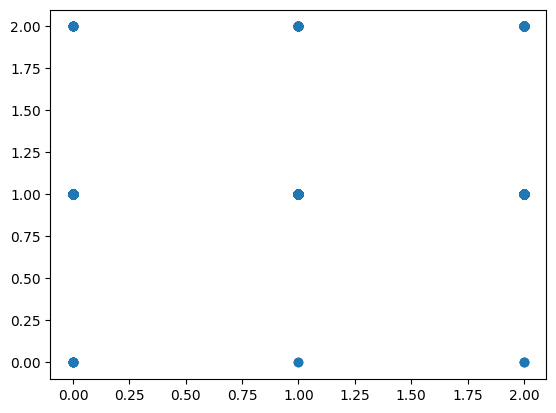

In [106]:
plt.scatter(y_test, y_pred)

In [107]:
df = pd.read_csv('test.csv')

In [108]:
X = df[features].apply(label_encoder.fit_transform)
prediction = clf.predict(X)
prediction = label_encoder.inverse_transform(prediction)
print(len(df['textID']), len(prediction))

3534 3534


In [109]:
results_df = pd.DataFrame({'textID': df['textID'], 'sentiment': prediction})

In [110]:
results_df.to_csv('prediction.csv', index=False)